# Decision Trees
Load the `mnist` dataset. Split it into training and test sets. Train and test a decision tree model using scikit-learn. Check the documentation to identify the most important hyperparameters, attributes, and methods of the model. Use them in practice.

## Importing Modules

In [11]:
import pandas as pd
import sklearn.model_selection
import sklearn.metrics
import sklearn.tree
import plotly.express as px

## Loading the Dataset

In [12]:
df = pd.read_csv("../../datasets/mnist.csv")
df = df.set_index("id")
df.head(3)

,class,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
id,,,,,,,,,,,,,,,,,,,,,
31953,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34452,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
60897,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Splitting Dataset into Training and Test Sets

In [13]:
x = df.drop(["class"], axis=1)
y = df["class"]
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y)

print("df:", df.shape)
print("x:", x.shape)
print("y:", y.shape)
print("x_train:", x_train.shape)
print("x_test:", x_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

df: (4000, 785)
x: (4000, 784)
y: (4000,)
x_train: (3000, 784)
x_test: (1000, 784)
y_train: (3000,)
y_test: (1000,)


## Training the Model

In [14]:
model = sklearn.tree.DecisionTreeClassifier()
model.fit(x_train, y_train);

## Testing the Model

In [15]:
y_predicted = model.predict(x_test)
accuracy = sklearn.metrics.accuracy_score(y_test, y_predicted)
accuracy

0.749

## Hyperparameter Tuning

In [21]:
min_samples_split_list = range(2, 10)
criterion_list = ["gini", "entropy"]
result_df = pd.DataFrame(columns=["min_samples_split", "criterion", "Accuracy"])

for k in min_samples_split_list:
    for criterion in criterion_list:
        model = sklearn.tree.DecisionTreeClassifier(criterion=criterion, min_samples_split=k)
        model.fit(x_train, y_train)
        y_predicted = model.predict(x_test)
        accuracy = sklearn.metrics.accuracy_score(y_test, y_predicted)
        result_df = result_df.append({"min_samples_split": k, "criterion": criterion, "Accuracy": accuracy}, ignore_index=True)

result_df

,min_samples_split,criterion,Accuracy
0,2,gini,0.743
1,2,entropy,0.782
2,3,gini,0.743
3,3,entropy,0.771
4,4,gini,0.744
5,4,entropy,0.771
6,5,gini,0.741
7,5,entropy,0.763
8,6,gini,0.746
9,6,entropy,0.756


In [22]:
k_df = result_df[result_df["criterion"]=="gini"]

fig = px.line(x=k_df["min_samples_split"], y=k_df["Accuracy"], labels={'x':'min_samples_split', 'y':'Accuracy'})
fig.show()

In [23]:
criterion_df = result_df[result_df["min_samples_split"]==3]

fig = px.bar(criterion_df, x='criterion', y='Accuracy')
fig.show()

## Drawing the Tree

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-z_i97kri because the default path (/home/mohammad/.config/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


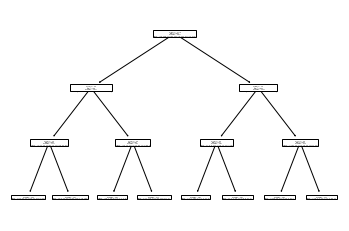

In [5]:
#from matplotlib import pyplot as plt
from sklearn import tree

model = sklearn.tree.DecisionTreeClassifier(max_depth=3)
model.fit(x_train, y_train);

#fig = plt.figure(figsize=(50,20))
tree.plot_tree(model);

In [6]:
text_representation = tree.export_text(model)
print(text_representation)

|--- feature_350 <= 116.50
|   |--- feature_568 <= 0.50
|   |   |--- feature_430 <= 1.00
|   |   |   |--- class: 7
|   |   |--- feature_430 >  1.00
|   |   |   |--- class: 4
|   |--- feature_568 >  0.50
|   |   |--- feature_435 <= 3.50
|   |   |   |--- class: 0
|   |   |--- feature_435 >  3.50
|   |   |   |--- class: 2
|--- feature_350 >  116.50
|   |--- feature_489 <= 1.50
|   |   |--- feature_290 <= 9.50
|   |   |   |--- class: 3
|   |   |--- feature_290 >  9.50
|   |   |   |--- class: 5
|   |--- feature_489 >  1.50
|   |   |--- feature_291 <= 0.50
|   |   |   |--- class: 1
|   |   |--- feature_291 >  0.50
|   |   |   |--- class: 8



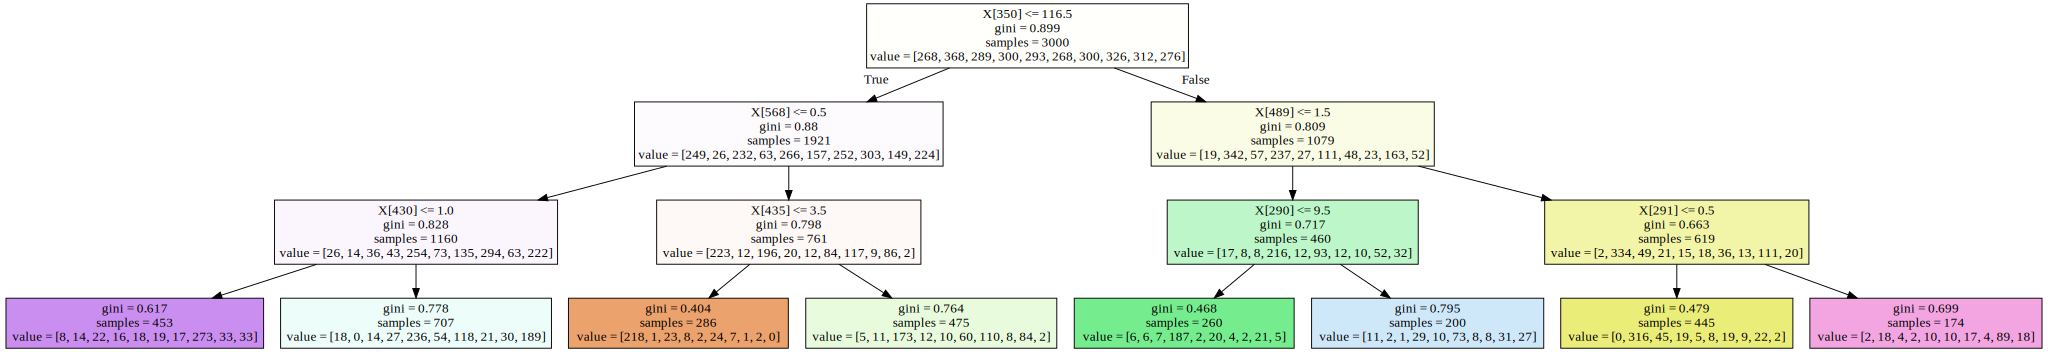

In [10]:
import graphviz

dot_data = tree.export_graphviz(model, out_file=None, 
                                #feature_names=iris.feature_names,  
                                #class_names=iris.target_names,
                                filled=True)

graph = graphviz.Source(dot_data, format="png") 
graph

In [ ]:
import graphviz

dot_data = tree.export_graphviz(model, out_file=None, filled=True)

graph = graphviz.Source(dot_data, format="png") 
graph